In [1]:
import warnings
import os
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(314093, 17)


In [3]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city'
]

In [4]:
X = df[used_features]
y = df['final_price']


In [5]:
cities = [
    "תל אביב יפו",
    "חיפה",
    "באר שבע",
    "ירושלים",
    "פתח תקווה",
    "אשדוד",
    "אשקלון",
    "נתניה",
    "ראשון לציון",
    "חולון",
    "רמת גן",
    "בת ים",
    "רחובות",
    "חדרה",
    "נהריה",
    "אילת",
    "קרית אתא",
    "עפולה",
    "בני ברק",
    "לוד"
]

test_size = 0.3

cities = {city: {"processor": None, "algo": None} for city in cities}


תל אביב יפו
(24242, 17)
(24242, 1071)


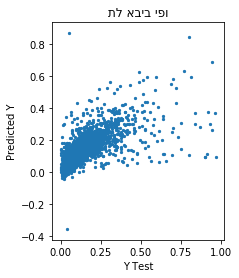

Mean squared error: 0.00
Mean squared error sqrt: 0.058223878431013676
Variance score: 0.53
חיפה
(22781, 17)
(22781, 780)


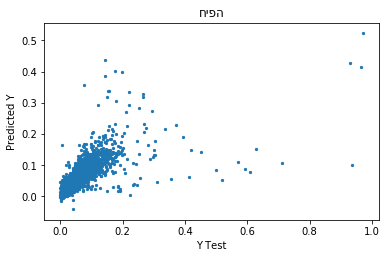

Mean squared error: 0.00
Mean squared error sqrt: 0.030346900522917997
Variance score: 0.56
באר שבע
(21686, 17)
(21686, 675)


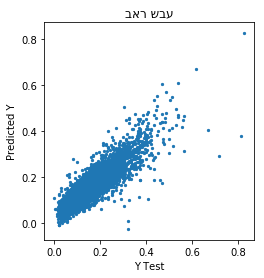

Mean squared error: 0.00
Mean squared error sqrt: 0.039023048818140296
Variance score: 0.78
ירושלים
(21634, 17)
(21634, 942)


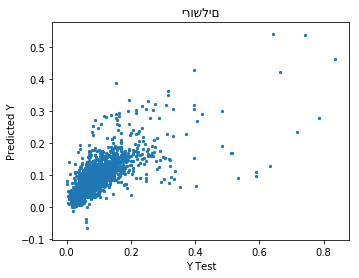

Mean squared error: 0.00
Mean squared error sqrt: 0.030343009045741973
Variance score: 0.59
פתח תקווה
(14333, 17)
(14333, 638)


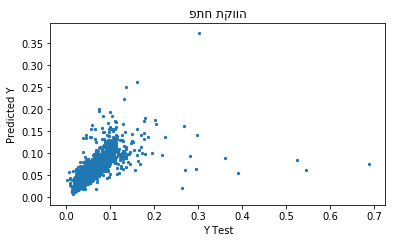

Mean squared error: 0.00
Mean squared error sqrt: 0.02190755304076178
Variance score: 0.45
אשדוד
(13601, 17)
(13601, 551)


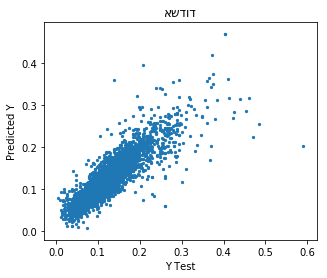

Mean squared error: 0.00
Mean squared error sqrt: 0.02853558910875362
Variance score: 0.76
אשקלון
(13424, 17)
(13424, 540)


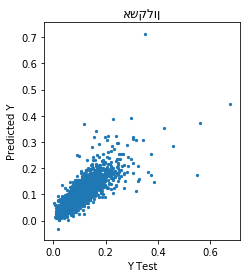

Mean squared error: 0.00
Mean squared error sqrt: 0.027815157913534887
Variance score: 0.69
נתניה
(12948, 17)
(12948, 583)


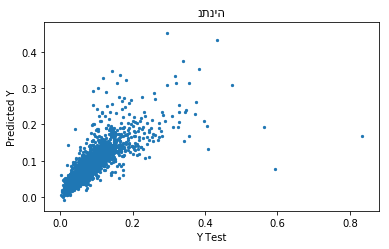

Mean squared error: 0.00
Mean squared error sqrt: 0.029077713901934567
Variance score: 0.63
ראשון לציון
(12212, 17)
(12212, 685)


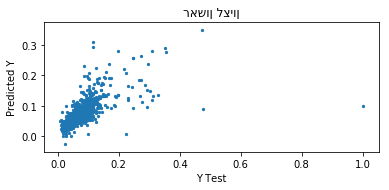

Mean squared error: 0.00
Mean squared error sqrt: 0.024016407048263095
Variance score: 0.54
חולון
(9946, 17)
(9946, 512)


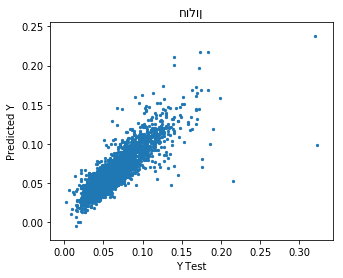

Mean squared error: 0.00
Mean squared error sqrt: 0.014480806601735953
Variance score: 0.74
רמת גן
(9103, 17)
(9103, 536)


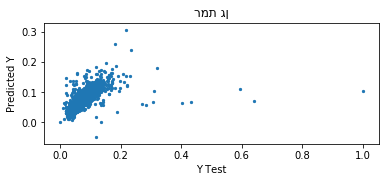

Mean squared error: 0.00
Mean squared error sqrt: 0.03144195197578649
Variance score: 0.34
בת ים
(8467, 17)
(8467, 413)


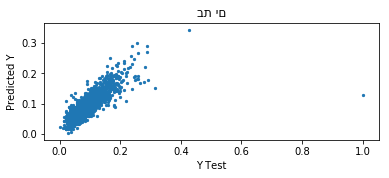

Mean squared error: 0.00
Mean squared error sqrt: 0.025935057559952453
Variance score: 0.67
רחובות
(7558, 17)
(7558, 507)


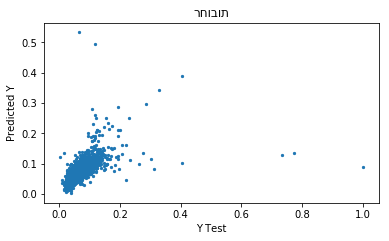

Mean squared error: 0.00
Mean squared error sqrt: 0.037289807242312886
Variance score: 0.21
חדרה
(6470, 17)
(6470, 479)


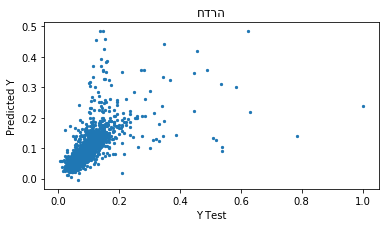

Mean squared error: 0.00
Mean squared error sqrt: 0.05126381752328898
Variance score: 0.30
נהריה
(5414, 17)
(5414, 367)


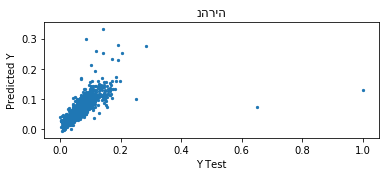

Mean squared error: 0.00
Mean squared error sqrt: 0.03195130568674802
Variance score: 0.44
אילת
(5347, 17)
(5347, 410)


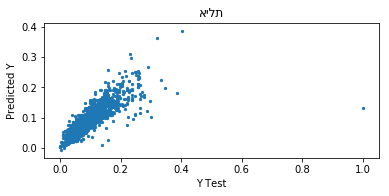

Mean squared error: 0.00
Mean squared error sqrt: 0.03490437380658048
Variance score: 0.65
קרית אתא
(4607, 17)
(4607, 416)


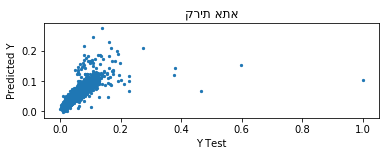

Mean squared error: 0.00
Mean squared error sqrt: 0.03690903953328883
Variance score: 0.44
עפולה
(4213, 17)
(4213, 400)


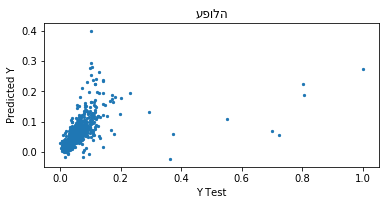

Mean squared error: 0.00
Mean squared error sqrt: 0.05193080450038342
Variance score: 0.22
בני ברק
(3430, 17)
(3430, 333)


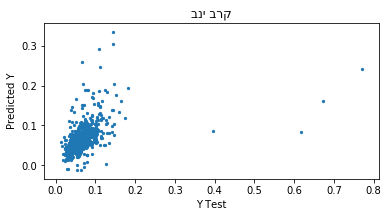

Mean squared error: 0.00
Mean squared error sqrt: 0.03946309156183309
Variance score: 0.14
לוד
(3258, 17)
(3258, 330)


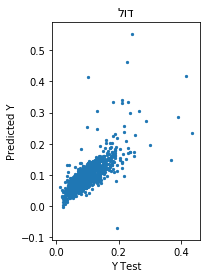

Mean squared error: 0.00
Mean squared error sqrt: 0.03453761729461122
Variance score: 0.52


In [6]:

for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)
    print(X.shape)
    
    # TODO: don't use, it takes too much time to estimate
    # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
    # X = poly.fit_transform(X)
    # print(datetime.now())
    # print(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(city)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

תל אביב יפו
(24242, 8)
(24242, 1071)
0.5223270228552743


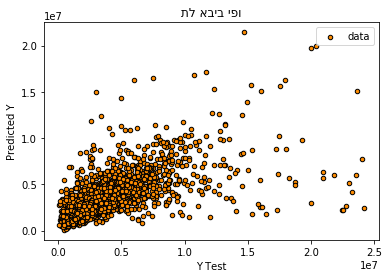

חיפה
(22781, 8)
(22781, 780)
0.61421757978291


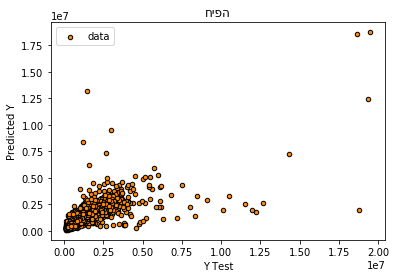

באר שבע
(21686, 8)
(21686, 675)
0.7825879930028028


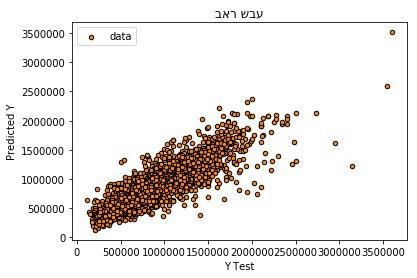

ירושלים
(21634, 8)
(21634, 942)
0.5974043568032298


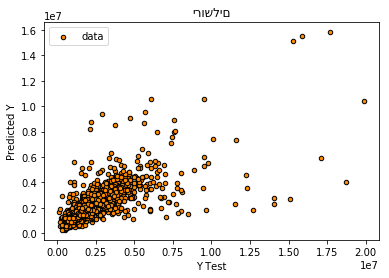

פתח תקווה
(14333, 8)
(14333, 638)
0.5114415415295976


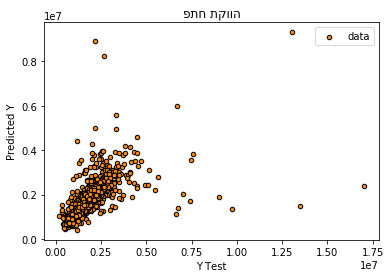

אשדוד
(13601, 8)
(13601, 551)
0.7590640717939097


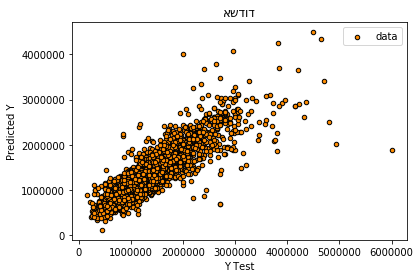

אשקלון
(13424, 8)
(13424, 540)
0.7026461625435652


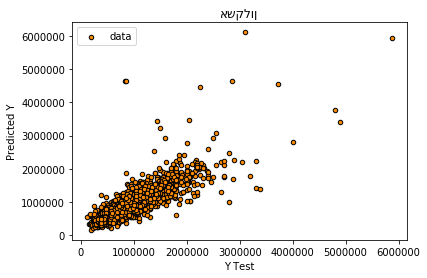

נתניה
(12948, 8)
(12948, 583)
0.47723863777303654


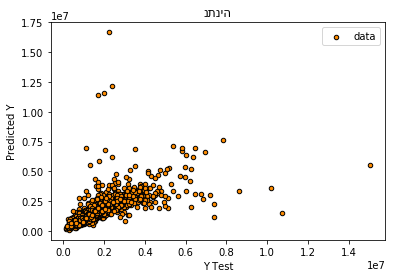

ראשון לציון
(12212, 8)
(12212, 685)
0.5739172339260711


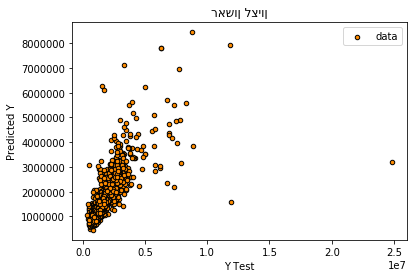

חולון
(9946, 8)
(9946, 512)
0.7290250660423088


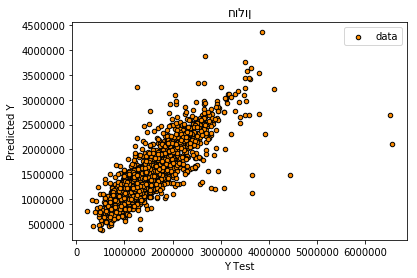

רמת גן
(9103, 8)
(9103, 536)
0.2284361784099076


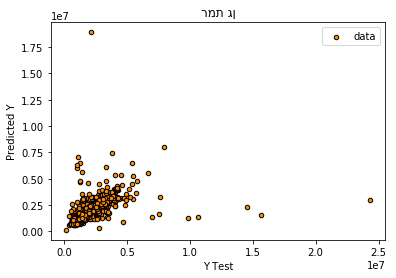

בת ים
(8467, 8)
(8467, 413)
0.6964817805443424


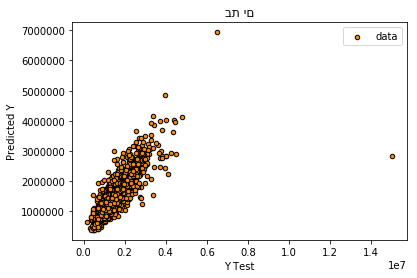

רחובות
(7558, 8)
(7558, 507)
-0.030010728356704597


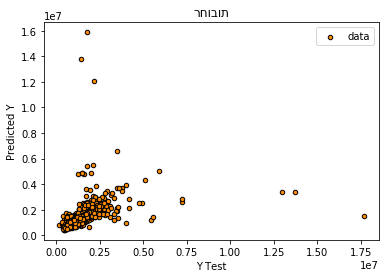

חדרה
(6470, 8)
(6470, 479)
0.3350156792492681


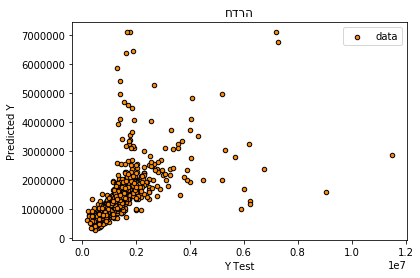

נהריה
(5414, 8)
(5414, 367)
0.2051271833107453


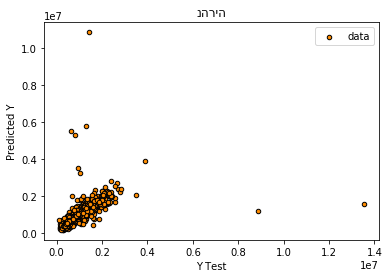

אילת
(5347, 8)
(5347, 410)
0.7122466107455132


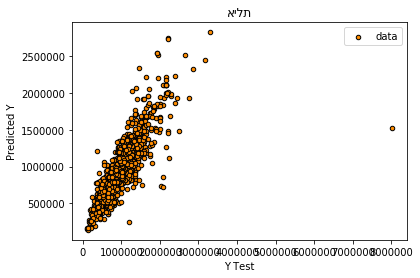

קרית אתא
(4607, 8)
(4607, 416)
0.4259686535865065


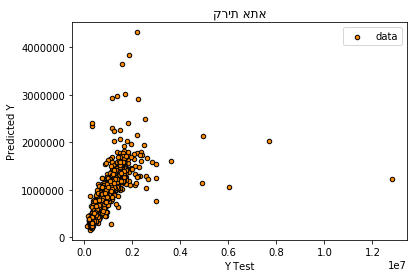

עפולה
(4213, 8)
(4213, 400)
0.11603695733898957


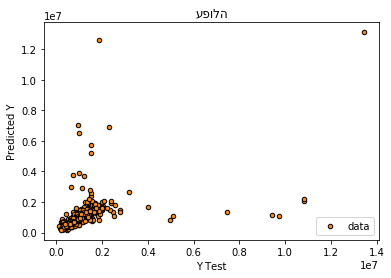

בני ברק
(3430, 8)
(3430, 333)
0.4309571690450744


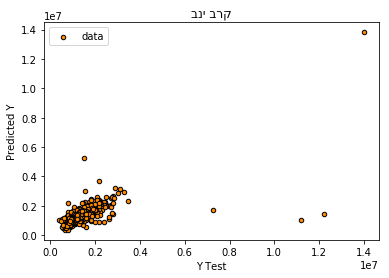

לוד
(3258, 8)
(3258, 330)
0.3987887666871685


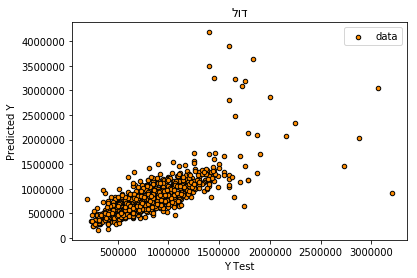

In [7]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    X = _df[used_features]
    y = _df['final_price']
    print(X.shape)

    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    cities[city]["processor"] = ohe
    print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    clf = GradientBoostingRegressor(n_estimators=450, max_depth=8)
    clf.fit(X_train, y_train)
    cities[city]["algo"] = clf
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))
    
    # Plot the results
    plt.figure()
    plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="data")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(city)
    plt.legend()
    plt.show()


In [8]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4, 4, 4, 4, 4], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': ["2015-01-01", "2019-01-01", "2010-01-01", "2016-01-01", "2019-01-01"],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות             4      2  2015-01-01   
1     יצחק רגר     שכונה ב'  דירת בבית קומות             4     10  2019-01-01   
2    משה פריבס    רמות הרכס  דירת בבית קומות             4      2  2010-01-01   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות             4      2  2016-01-01   
4       התקווה   מרכז אזרחי  דירת בבית קומות             4      2  2019-01-01   

   building_mr     city  
0          115  באר שבע  
1          116  באר שבע  
2          120  באר שבע  
3          120  באר שבע  
4          113  באר שבע  
[1195151.4017552075, 1087095.0694314495, 1115039.9436028842, 1258753.9736399045, 1443084.3346370559]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    y, info = pd.qcut(np.array(y), 10, retbins=True)
    print(info)
    y = pd.DataFrame(y.codes)
    
    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

    rfc = RandomForestClassifier(n_estimators=150)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))


תל אביב יפו
(24242, 17)
[  100800.   1025000.   1350000.   1640000.   1906984.   2221169.5
  2550000.   2900000.   3435000.   4425922.2 24999999. ]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       703
           1       0.43      0.42      0.43       757
           2       0.33      0.31      0.32       704
           3       0.36      0.35      0.35       733
           4       0.31      0.31      0.31       698
           5       0.31      0.30      0.30       759
           6       0.31      0.31      0.31       725
           7       0.34      0.29      0.31       726
           8       0.37      0.41      0.39       739
           9       0.62      0.70      0.65       729

   micro avg       0.40      0.40      0.40      7273
   macro avg       0.39      0.40      0.40      7273
weighted avg       0.39      0.40      0.40      7273

[[430 131  59  30   9  10   5  11   9   9]
 [194 317 113  47  27  19  11  12   9   8]
 [ 51 1

              precision    recall  f1-score   support

           0       0.55      0.69      0.61       353
           1       0.41      0.41      0.41       414
           2       0.32      0.33      0.33       409
           3       0.28      0.25      0.26       373
           4       0.29      0.27      0.28       420
           5       0.27      0.27      0.27       401
           6       0.34      0.30      0.32       378
           7       0.35      0.33      0.34       382
           8       0.50      0.48      0.49       368
           9       0.69      0.76      0.72       387

   micro avg       0.41      0.41      0.41      3885
   macro avg       0.40      0.41      0.40      3885
weighted avg       0.40      0.41      0.40      3885

[[243  80  11   8   8   2   0   1   0   0]
 [111 170  84  22  18   4   1   0   3   1]
 [ 46  92 137  64  28  29   9   2   2   0]
 [ 21  37  84  94  71  44  16   3   2   1]
 [  7  23  65  62 113  70  35  37   4   4]
 [ 14  12  29  45  76 110 

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       170
           1       0.43      0.44      0.43       148
           2       0.38      0.33      0.35       172
           3       0.30      0.32      0.31       167
           4       0.31      0.34      0.32       164
           5       0.29      0.27      0.28       163
           6       0.33      0.29      0.31       167
           7       0.41      0.33      0.36       157
           8       0.54      0.58      0.56       164
           9       0.67      0.75      0.70       153

   micro avg       0.44      0.44      0.44      1625
   macro avg       0.43      0.44      0.43      1625
weighted avg       0.43      0.44      0.43      1625

[[128  30  10   2   0   0   0   0   0   0]
 [ 42  65  25   9   5   2   0   0   0   0]
 [ 12  39  56  34  21   3   2   2   2   1]
 [  3   9  35  54  29  24   8   1   4   0]
 [  1   4  12  32  55  28  15  13   3   1]
 [  3   2   5  28  35  44 

In [10]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

In [11]:
# to load:
cities = {city: {
    "processor": joblib.load(os.path.join("pickles", city, "processor.joblib")), 
    "algo": joblib.load(os.path.join("pickles", city, "algo.joblib"))
} for city in cities}